#### Hough Transform for detecting circles.
I try to implement hough transform for circles, using gradient information to reduce the votes of each edge pixel to exactly two (one for each orientation of the gradient in that point). The code for the functions are all inside utils/util.py file. 

Below i will just use the created API for detecting circles.

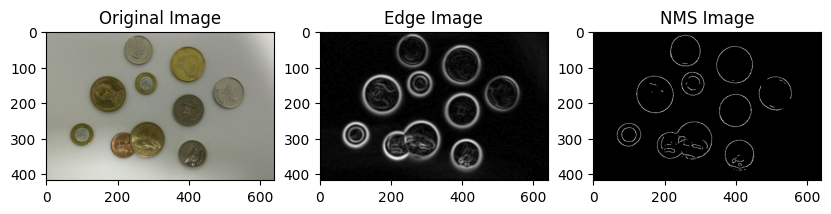

Number of edge pixels in edge magnitude image:  187585
Number of edge pixels in nms image:  71247


In [2]:
from utils.util import (
    myEdgeFilter,
    nms,
    hough_circle_detect,
    display_circles,
    otsus_thresholding,
    display_voting_lines
)
import cv2
import matplotlib.pyplot as plt

radii = range(15, 100)
img = cv2.imread("./data/HoughCircles.jpg", cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply the edge filter form previous assignment
edge_mag, edge_or = myEdgeFilter(gray_image, 3)
# Perform non-maximum suppression
nms_edge_mag = nms(edge_mag, edge_or)
# Threshold the edge magnitude image using otsus from assignment 1
thresholded_nms,_ = otsus_thresholding(nms_edge_mag)

fig = plt.figure(figsize=(10, 10))
fig.add_subplot(1, 3, 1).add_artist(plt.imshow(img))
plt.title("Original Image")
fig.add_subplot(1, 3, 2).add_artist(plt.imshow(edge_mag, cmap="gray"))
plt.title("Edge Image")
fig.add_subplot(1, 3, 3).add_artist(plt.imshow(thresholded_nms, cmap="gray"))
plt.title("NMS Image")
plt.show()

# count number of edge pixels in nms vs magnitude image
print("Number of edge pixels in edge magnitude image: ", len(edge_mag[edge_mag > 0]))
print("Number of edge pixels in nms image: ", len(nms_edge_mag[nms_edge_mag > 0]))  

We apply the hough circle detection for a radius interval of 15 to 100 pixels it the binary edge image after non-maximum suppression.

Also the voting lines are depicted as arrows for visualization and debugging purposes.

In [3]:
img_shape = img.shape[:2]
circles, acc = hough_circle_detect(nms_edge_mag,edge_or,img_shape, radii,100)
# if cirlcle do not contain any circle
if all([len(circles[i]) == 0 for i in range(3)]):
    print("No circles detected")

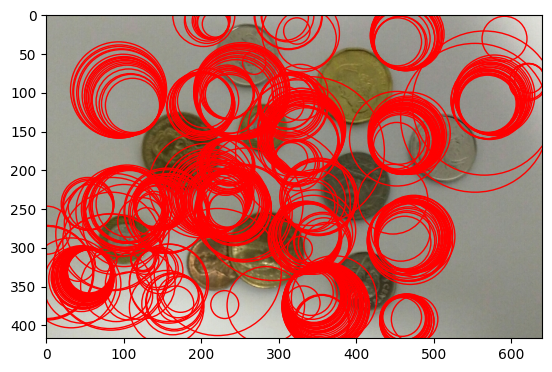

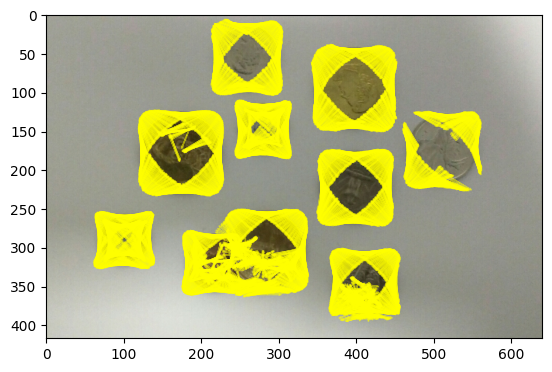

In [7]:
import numpy as np
display_circles(circles, img,radii)
display_voting_lines(thresholded_nms,edge_or, img)